# Bivariate analysis regarding correlation on 1 combination of 2 columns of categorical data on Mushrooms dataset

In [9]:
import pandas as pd

In [10]:
import seaborn as sns
sns.set_style("dark")

In [11]:
from scipy.stats import chi2_contingency

As my previous dataset had mostly numerical data, I am using this dataset for categorical excersises. The data is categorical data about mushrooms. Each mushrooms has data on whether it is poisinous or not and information about the mushrooms properties.  
https://www.kaggle.com/hatterasdunton/mushroom-classification-updated-dataset?select=mushroomsupdated.csv

In [12]:
df = pd.read_csv('mushrooms.csv', sep=',')
sns.set_style("dark")

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


I would like to see if color and poininousness are correlated. I know this is the case with animals, but I don't know about mushrooms

In [14]:
table = df.groupby(['cap-color','class']).size().unstack('class', fill_value=0)
table

class,Edible,Poisonous
cap-color,,
Brown,1264,1020
Buff,48,120
Cinnamon,32,12
Green,1048,808
Pink,56,88
Purple,16,0
Red,624,876
White,720,320
Yellow,400,672


There are some significant differences in ratios: Brown doesn't say anything, white means it is probably okay and all purple mushrooms (in this dataset at least) are poisionous.

<AxesSubplot:xlabel='cap-color'>

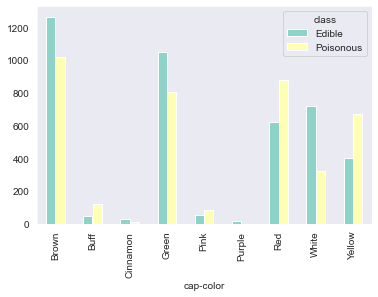

In [15]:
table.plot(kind='bar')

The bar plot also shows significantly different ratios

In [16]:
chi2_contingency(table)

(375.346859678969,
 3.495286115362265e-76,
 8,
 array([[1183.04677499, 1100.95322501],
        [  87.01920236,   80.98079764],
        [  22.79074348,   21.20925652],
        [ 961.35499754,  894.64500246],
        [  74.58788774,   69.41211226],
        [   8.28754308,    7.71245692],
        [ 776.95716396,  723.04283604],
        [ 538.69030034,  501.30969966],
        [ 555.26538651,  516.73461349]]))

The chance of the two variables being correlated is very high.